In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Load the given data and print the first 5 Rows of all columns.
df = pd.read_excel("Sample - Superstore.xlsx", sheet_name="Orders", header=0)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,2021-01-03,2021-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,2021-01-05,2021-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [37]:
#Find missing values (if any) and fix them

missing = df.isnull().sum()
missing = missing[ missing>0]
if missing.empty:
    print("No missing values found in the dataset.")
else:
    for col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

No missing values found in the dataset.


In [10]:
#Find the date with the most orders 
dates = df["Order Date"].values
unique, counts = np.unique(dates, return_counts=True)
max_index = np.argmax(counts)
print("Most orders were placed on:", unique[max_index], "\nMost number of orders placed:", counts[max_index])
#Find the date with the most shipments
ship = df["Ship Date"].values
uniqueship, shipcount = np.unique(ship, return_counts=True)
maxship = np.argmax(shipcount)
print("Most orders were shipped on:", uniqueship[maxship], "\nMost number of orders shipped on that day:", countship[maxship])


Most orders were placed on: 2023-09-05T00:00:00.000000000 
Most number of orders placed: 38
Most orders were shipped on: 2022-12-16T00:00:00.000000000 
Most number of orders shipped on that day: 38


(array([0, 1, 2]),
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

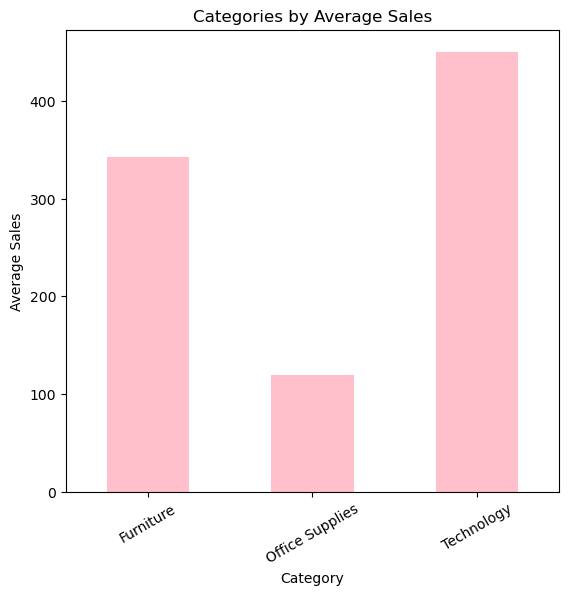

In [38]:
#Plotting a Bar Graph: Avg sales by Category 

avg_sales = df.groupby('Category')['Sales'].mean() #Grouping sales and profit by Category
avg_profit = df.groupby('Category')['Profit'].mean()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
avg_sales.plot(kind='bar', color= 'pink')
plt.title("Categories by Average Sales")
plt.xlabel("Category")
plt.ylabel("Average Sales")
plt.xticks(rotation=30)

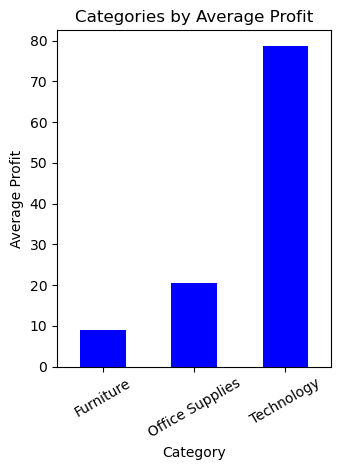

In [13]:
#Bar Chart For Average Profit
plt.subplot(1,2,2)
avg_profit.plot(kind='bar', color='blue')
plt.title("Categories by Average Profit")
plt.xlabel("Category")
plt.ylabel("Average Profit")
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

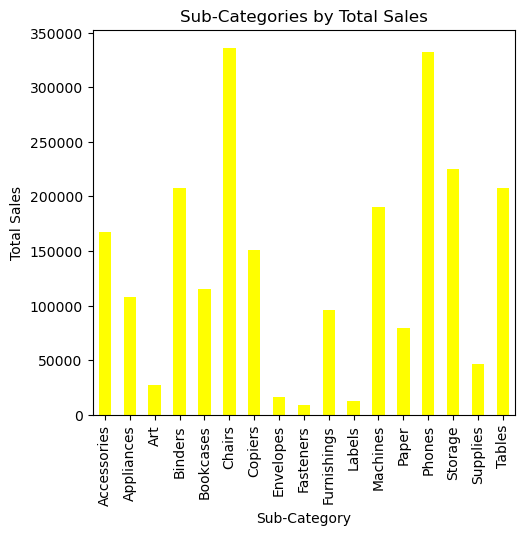

In [40]:

#Plotting a Bar Graph: Total sales by Sub-category 
total_sales = df.groupby('Sub-Category')['Sales'].sum() #Grouping sales and profit by Sub-Category
total_profit = df.groupby('Sub-Category')['Profit'].sum()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
total_sales.plot(kind='bar', color= 'yellow')
plt.title("Sub-Categories by Total Sales")
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=90);


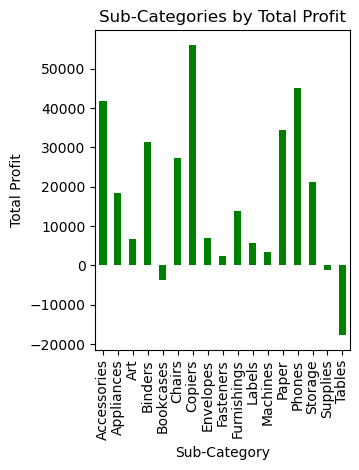

In [41]:
#Bar Chart For Total Profit
plt.subplot(1,2,2)
total_profit.plot(kind='bar', color='green')
plt.title("Sub-Categories by Total Profit")
plt.xlabel("Sub-Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

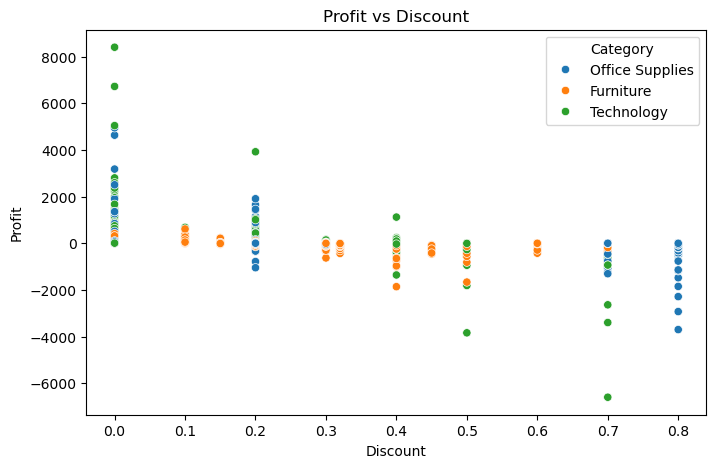

In [17]:
#To detect if giving a discount is hurting profit.
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Profit vs Discount")
plt.show()

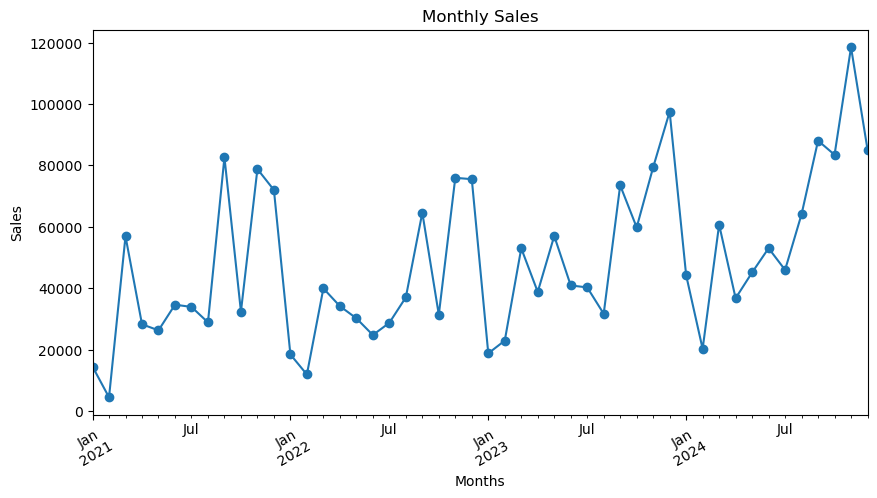

In [18]:
#To analyze change in sales over months.

df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind= 'line', figsize=(10,5), marker='o')
plt.title("Monthly Sales")
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(rotation=30)
plt.show()

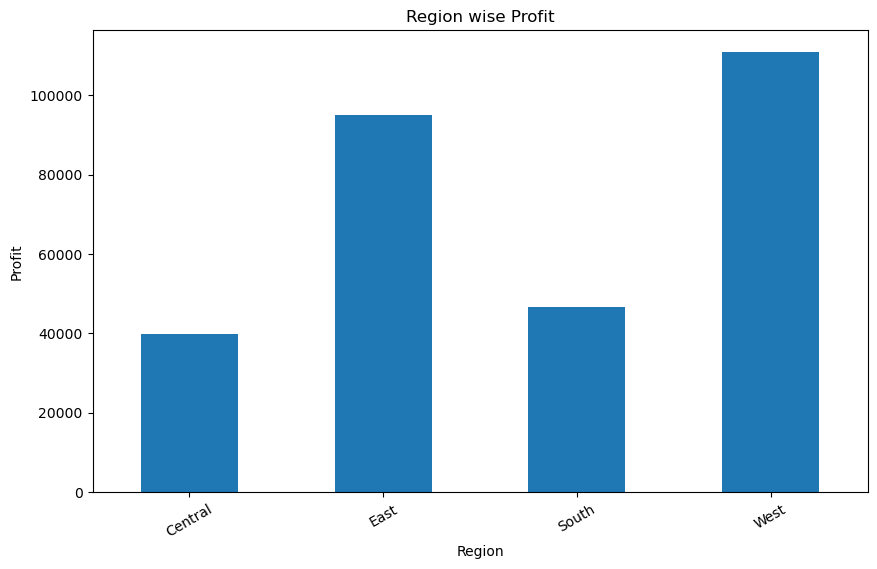

In [19]:
#To find which region is most/least profitable.

profit = df.groupby('Region')['Profit'].sum()
profit.plot(kind= 'bar', figsize=(10,6))
plt.title("Region wise Profit")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.xticks(rotation=30)
plt.show()

In [21]:
#Top 5 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


In [42]:
#Finding Average, Minimum, and Maximum values of Overall Sales and Profit.
print("Sales: ", df['Sales'].agg(['mean', 'max', 'min']))
print("Profit: ", df['Profit'].agg(['mean', 'max', 'min']))

Sales:  mean      228.225854
max     22638.480000
min         0.444000
Name: Sales, dtype: float64
Profit:  mean      28.673417
max     8399.976000
min    -6599.978000
Name: Profit, dtype: float64


In [23]:
#Which Sub-Category has the Highest Loss Overall?
subcat_loss = df.groupby('Sub-Category')['Profit'].sum().sort_values()
print(subcat_loss.head(1))

Sub-Category
Tables   -17753.2061
Name: Profit, dtype: float64


In [24]:
#Most Frequently Ordered Product
most_ordered = df['Product Name'].value_counts().head(1)
print(most_ordered)


Product Name
Staples    50
Name: count, dtype: int64


In [25]:
#Total Number of Orders in Each Region
orders_by_region = df.groupby('Region')['Order ID'].nunique()
print(orders_by_region)

Region
Central    1179
East       1475
South       822
West       1635
Name: Order ID, dtype: int64


In [26]:
#Total Sales in Each Year
df['Year'] = df['Order Date'].dt.year
sales_by_year = df.groupby('Year')['Sales'].sum()
print(sales_by_year)
#City-wise Sales and Profit
state_summary = df.groupby('City')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print(state_summary.head(10))


Year
2021    494040.2121
2022    472993.0310
2023    613933.5800
2024    745567.5312
Name: Sales, dtype: float64
                     Sales      Profit
City                                  
New York City  256368.1610  62036.9837
Los Angeles    175851.3410  30440.7579
Seattle        119540.7420  29156.0967
San Francisco  112669.0920  17507.3854
Philadelphia   109077.0130 -13837.7674
Houston         64504.7604 -10153.5485
Chicago         48539.5410  -6654.5688
San Diego       47521.0290   6377.1960
Jacksonville    44713.1830  -2323.8350
Springfield     43054.3420   6200.6974


In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select only numeric features
X = df[['Sales', 'Quantity', 'Discount']].fillna(0)

# Scale values so that all features are comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df[['Sales','Quantity','Discount','Cluster']].head())


     Sales  Quantity  Discount  Cluster
0   16.448         2       0.2        0
1    3.540         2       0.8        1
2   11.784         3       0.2        0
3  272.736         3       0.2        0
4   19.536         3       0.2        0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features (X) and Target (y)
X = df[['Sales', 'Quantity', 'Discount']].fillna(0)
y = df['Profit']

# Split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.399815256823286
